<a href="https://colab.research.google.com/github/Arundhamjena/SQL_case_study/blob/main/netflix_(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center; font-size: 29px;">
  <strong>Netflix</strong><br>
  <strong>27 September 2024</strong>
</p>

### **Business Case Study: Analyzing Netflix's Content Strategy**

---

#### **_1. Introduction_**
Netflix is a leading media and video streaming platform, boasting over **222 million subscribers** globally and a vast library of over **10,000 movies and TV shows**. Understanding viewer preferences and trends is crucial for Netflix to enhance its content offerings and maintain competitive growth. This analysis aims to derive actionable insights to inform Netflix's content production strategies across various regions.

#### **_2. Problem Statement_**  
The primary objective of this study is to analyze the Netflix dataset and generate insights that can help the company decide which types of shows and movies to produce and how to expand its business in different countries.

#### **_3. Dataset Overview_**
The dataset includes key attributes such as:
- **Show_id**: Unique ID for each movie or TV show.
- **Type**: Indicates whether the entry is a movie or TV show.
- **Title**: The title of the movie or TV show.
- **Director**: The director of the movie or show.
- **Cast**: Actors involved in the production.
- **Country**: The country of origin.
- **Date_added**: Date the title was added to Netflix.
- **Release_year**: The year the title was released.
- **Rating**: TV rating of the title.
- **Duration**: Total duration in minutes or number of seasons.
- **Listed_in**: Genre classification.
- **Description**: A brief summary of the title.


#### **_1. Import Library_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **_2. Importing Dataset_**

In [2]:
#Reading the CSV file data for Netflix
netflix_data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

**_2.1. Exploring the Data_**

In [3]:
#Get basic information about the DataFrame
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Displaying data types of each column
netflix_data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [5]:
#Finding out the DataFrame dimensionality
netflix_data.shape

(8807, 12)

In [6]:
# Summary statistics for numerical columns
netflix_data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
#Viewing and understanding few 5 rows of the Netfix dataframe
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### **_3. Data Cleaning_**

**_3.1. Stripping Whitespace from Columns_**

In [8]:
# Clean the data by stripping whitespace from relevant columns
# This ensures there are no leading or trailing spaces that could affect unnesting.
netflix_data["date_added"] = netflix_data["date_added"].str.strip()
netflix_data['cast'] = netflix_data['cast'].str.strip()
netflix_data['country'] = netflix_data['country'].str.strip()
netflix_data['listed_in'] = netflix_data['listed_in'].str.strip()
netflix_data['director'] = netflix_data['director'].str.strip()

**_3.2. Extracting Date Components from 'date_added'_**

In [9]:
# Extracting Date Components from 'date_added'
# Convert the cleaned 'date_added' column to datetime format and extract year, month, day name, and month name into new columns.
netflix_data["year_added"] = pd.to_datetime(netflix_data["date_added"]).dt.year
netflix_data["month_added"] = pd.to_datetime(netflix_data["date_added"]).dt.month
netflix_data["day_added"] = pd.to_datetime(netflix_data["date_added"]).dt.day_name()
netflix_data["month_name"] = pd.to_datetime(netflix_data["date_added"]).dt.month_name()

**_3.3. Un-nesting the columns_**

In [10]:
# Creating a function to un-nest a dataframe based on a specific column
def unnest_dataframe(df, column):
    return (
        df.drop(column, axis=1)  # Drop the original column
        .join(                   # Join the unnested values back to the DataFrame
            df[column].str.split(',', expand=True)  # Split values in the column by commas
            .stack()            # Stack the split values to create a long format
            .reset_index(level=1, drop=True)  # Reset the index
            .rename(column)     # Rename the new column to the original column name
        )
    )


# Un-nesting the 'cast' column
unnested_cast = unnest_dataframe(netflix_data, 'cast')
# Un-nesting the 'title' column
unnested_title = unnest_dataframe(netflix_data, 'title')
# Un-nesting the 'country' column
unnested_country = unnest_dataframe(netflix_data, 'country')
# Un-nesting the 'listed_in' (genre) column
unnested_listed_in = unnest_dataframe(netflix_data, 'listed_in')
# Un-nesting the 'director' column
unnested_director = unnest_dataframe(netflix_data, 'director')
# Showing the first few rows of the un-nested dataframes
unnested_cast.head(1), unnested_country.head(1), unnested_listed_in.head(1), unnested_director.head(1)

(  show_id   type                 title         director        country  \
 0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  United States   
 
            date_added  release_year rating duration      listed_in  \
 0  September 25, 2021          2020  PG-13   90 min  Documentaries   
 
                                          description  year_added  month_added  \
 0  As her father nears the end of his life, filmm...      2021.0          9.0   
 
   day_added month_name cast  
 0  Saturday  September  NaN  ,
   show_id   type                 title         director cast  \
 0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  NaN   
 
            date_added  release_year rating duration      listed_in  \
 0  September 25, 2021          2020  PG-13   90 min  Documentaries   
 
                                          description  year_added  month_added  \
 0  As her father nears the end of his life, filmm...      2021.0          9.0   
 
   day_added month_name        co

#### **_4. Exploring the Cleaned Data_**

In [11]:
# Overview of the cleaned dataset
print("Data Overview:")
netflix_data.info()
print("\nShape of the Dataset:", netflix_data.shape)
print("\nData Types of Each Column:")
print(netflix_data.dtypes)
print("\nSummary Statistics for All Columns:")
print(netflix_data.describe(include="all"))
print("\nFirst Few Rows:")
print(netflix_data.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  year_added    8797 non-null   float64
 13  month_added   8797 non-null   float64
 14  day_added     8797 non-null   object 
 15  month_name    8797 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 1.1+ MB

Shape of the Dataset: (8807, 16)

Data T

#### **_5. Handle Missing Values_**

**_5.1. Check for missing values_**

In [12]:
# Check for missing values

netflix_data.isnull().sum()
# It will display the count of missing values for each column

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**_5.2. For categorical variables with null values, update those rows as unknown_column_name_**

In [13]:
# Handling missing values for categorical variables
categorical_columns = ['director', 'cast', 'country', 'listed_in', 'rating', 'date_added', 'release_year']
for col in categorical_columns:
    netflix_data[col].fillna(f'Unknown {col.capitalize()}', inplace=True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,September
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,September
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,September
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,September


**_5.3. Replace with 0 for continuous variables having null values_**

In [14]:
# Handling missing values for continuous variables
continuous_columns = ['duration']  # Add other continuous columns if needed
for col in continuous_columns:
    netflix_data[col].fillna(0, inplace=True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,September
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,September
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,September
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,September


**_Re-check for Missing Values_**

In [15]:
#Check for null values again to confirm the changes
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#### **_6. Exploring the Data Distribution_**

**_6.1. Analyzing Distribution of Content Types_**

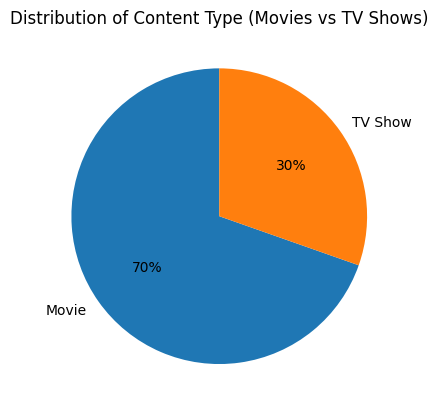

In [16]:
# Get the value counts of the 'type' column (e.g., Movie, TV Show)
dt_ty = netflix_data['type'].value_counts()

# Plotting the pie chart for data distribution in 'type'
plt.pie(dt_ty,
        labels = dt_ty.index,    # Labels are the categories (Movie, TV Show)
        autopct = "%.f%%",       # Display the percentage on the chart
        startangle=90,           # Start the pie chart at 90 degrees for a better view
       )

# Set the title and show the chart
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.show()

**Insights:**

* Content Type Distribution: The pie chart highlights the percentage breakdown of Movies and TV Shows on Netflix, revealing which type dominates.

* Viewer Preferences: It indicates audience preferences, suggesting whether users lean more towards Movies or TV Shows.

* Strategic Focus: Insights can inform Netflix's content strategy, guiding decisions on future investments in either category.

#### **_7. Non-Graphical and Graphical Analysis of Categorical Variables_**

**_7.1. Non-Graphical Analysis of Categorical Variables_**

In [17]:
categorical_columns = ['director', 'type', 'country', 'listed_in', 'release_year', 'date_added', 'cast', 'rating', 'duration']
value_counts = {}

for column in categorical_columns:
    value_counts[column] = netflix_data[column].value_counts()

# Print the value counts for review
print(value_counts)

{'director': director
Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64, 'type': type
Movie      6131
TV Show    2676
Name: count, dtype: int64, 'country': country
United States                             2818
India                                      972
Unknown Country                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                 

**_7.1.1 Unique Movies and TV Shows_**

In [18]:
# Counting the number of unique titles in each type (Movie/TV Show)
unique_tv_shows = netflix_data.query('type == "TV Show"')['title'].nunique()
unique_movies = netflix_data.query('type == "Movie"')['title'].nunique()

# Displaying the number of unique TV Shows and Movies
print("Number of Unique TV Shows:", unique_tv_shows)
print("Number of Unique Movies:", unique_movies)

Number of Unique TV Shows: 2676
Number of Unique Movies: 6131


**Insights**
* Knowing the number of unique titles helps in identifying content diversity.
  
**Recommendations**
* Consider producing more content in underrepresented categories to attract a broader audience.


**_7.1.2 Count of Total Movies and TV Shows_**

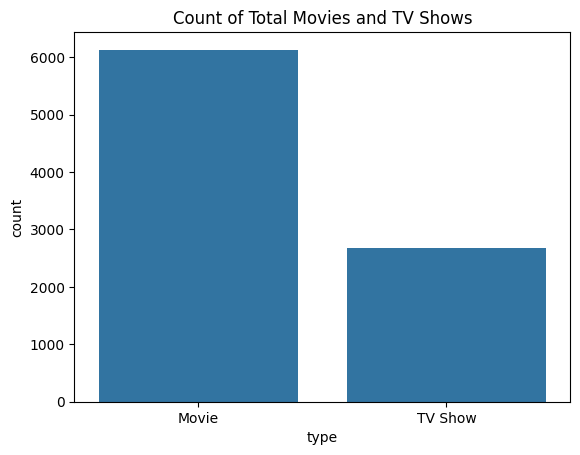

In [19]:
# Countplot of total movies and TV shows
sns.countplot(data=netflix_data, x='type')
plt.title('Count of Total Movies and TV Shows')
plt.show()

**Insights**
* A balanced count between Movies and TV Shows indicates a comprehensive content library.
  
**Recommendations**
* Analyze viewer preferences to adjust content production accordingly.


**_7.1.3 Distribution of Movies and TV Shows on Netflix_**

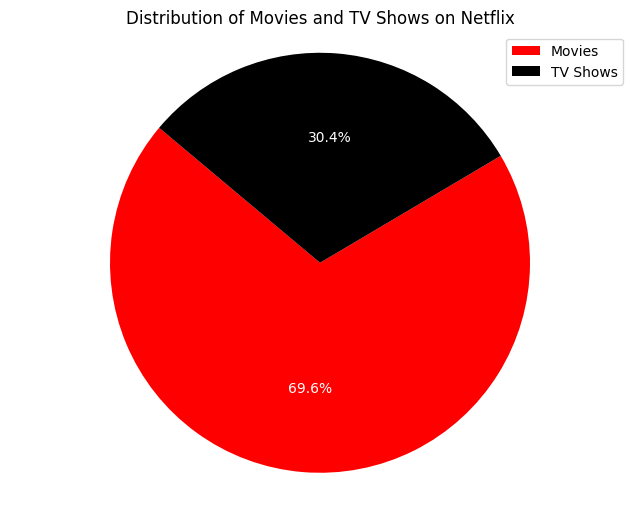

In [20]:
# Data for pie chart
labels = 'Movies', 'TV Shows'
sizes = [unique_movies, unique_tv_shows]
colors = ['red', 'black']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
        textprops={'color': "white"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()
plt.show()

**Insights**
* The pie chart visually represents the share of Movies vs. TV Shows.
    
**Recommendations**
* This can inform strategic decisions on content focus areas to maximize viewership.

**_7.1.4 Top Countries by Unique Movie Titles_**

In [21]:
# Cleaning the data by removing unknown countries
df_cleaned = netflix_data[netflix_data['country'] != 'Unknown Country']

# Counting unique movies by country
count_of_movies = df_cleaned.query('type == "Movie"').groupby('country')['title'].nunique()
top_countries_movies = count_of_movies.sort_values(ascending=False).head(10)

# Displaying the top countries with the most movies
print("Top 10 Countries with the Most Movies on Netflix:")
print(top_countries_movies)

Top 10 Countries with the Most Movies on Netflix:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64


**Insights**
* Identifying top countries for movie production can help in sourcing more localized content.
  
**Recommendations**
* Engage with production companies in these countries for potential collaborations.

**_7.1.5 Top Countries by Unique TV Shows_**

In [22]:
# Counting unique TV shows by country
count_of_tvshows = df_cleaned.query('type == "TV Show"').groupby('country')['title'].nunique()
top_countries_tvshows = count_of_tvshows.sort_values(ascending=False).head(10)

# Displaying the top countries with the most TV Shows
print("Top 10 Countries with the Most TV Shows on Netflix:")
print(top_countries_tvshows)

Top 10 Countries with the Most TV Shows on Netflix:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64


**Insights**
* Understanding where the most TV shows are produced can guide strategic content acquisition.

**Recommendations**
* Explore partnerships with content creators in these regions to enhance offerings.


**_7.1.6 Visualization of Top Countries_**

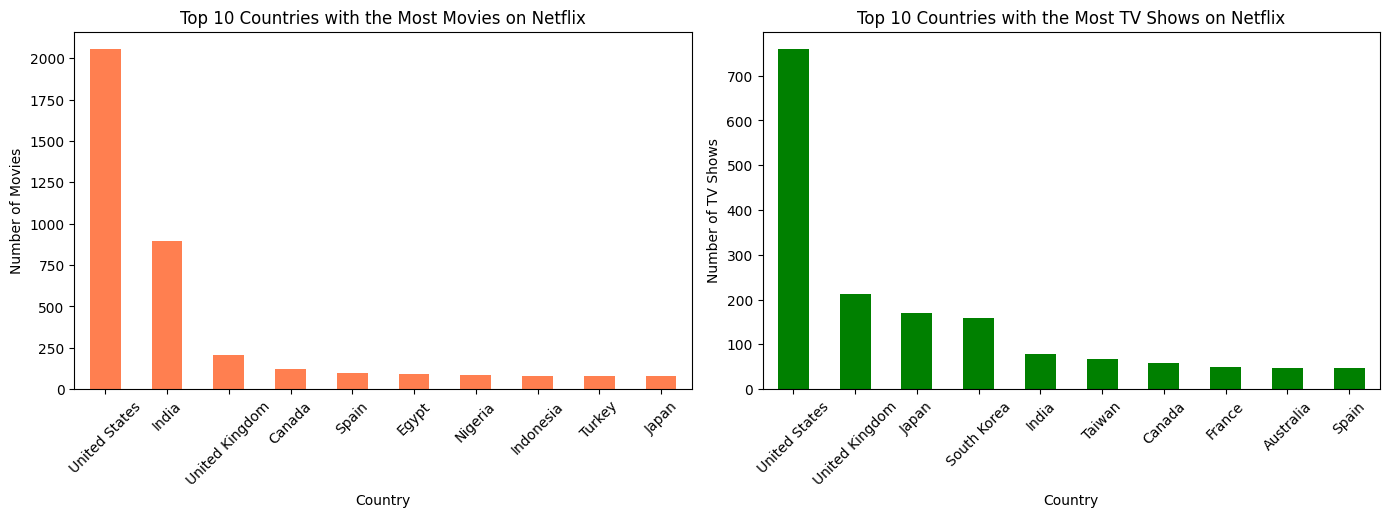

In [23]:
# Plotting the bar charts for top countries
plt.figure(figsize=(14, 9))

# Top countries for movies
plt.subplot(2, 2, 1)
top_countries_movies.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with the Most Movies on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Adjust rotation for better readability

# Top countries for TV shows
plt.subplot(2, 2, 2)
top_countries_tvshows.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)  # Adjust rotation for better readability

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


**Insights**
* Visual representation of country-specific content distribution aids in identifying market opportunities.

**Recommendations**
* Use this data to tailor content marketing strategies in different regions.

**_7.2. Graphical Analysis of Categorical Variables_**

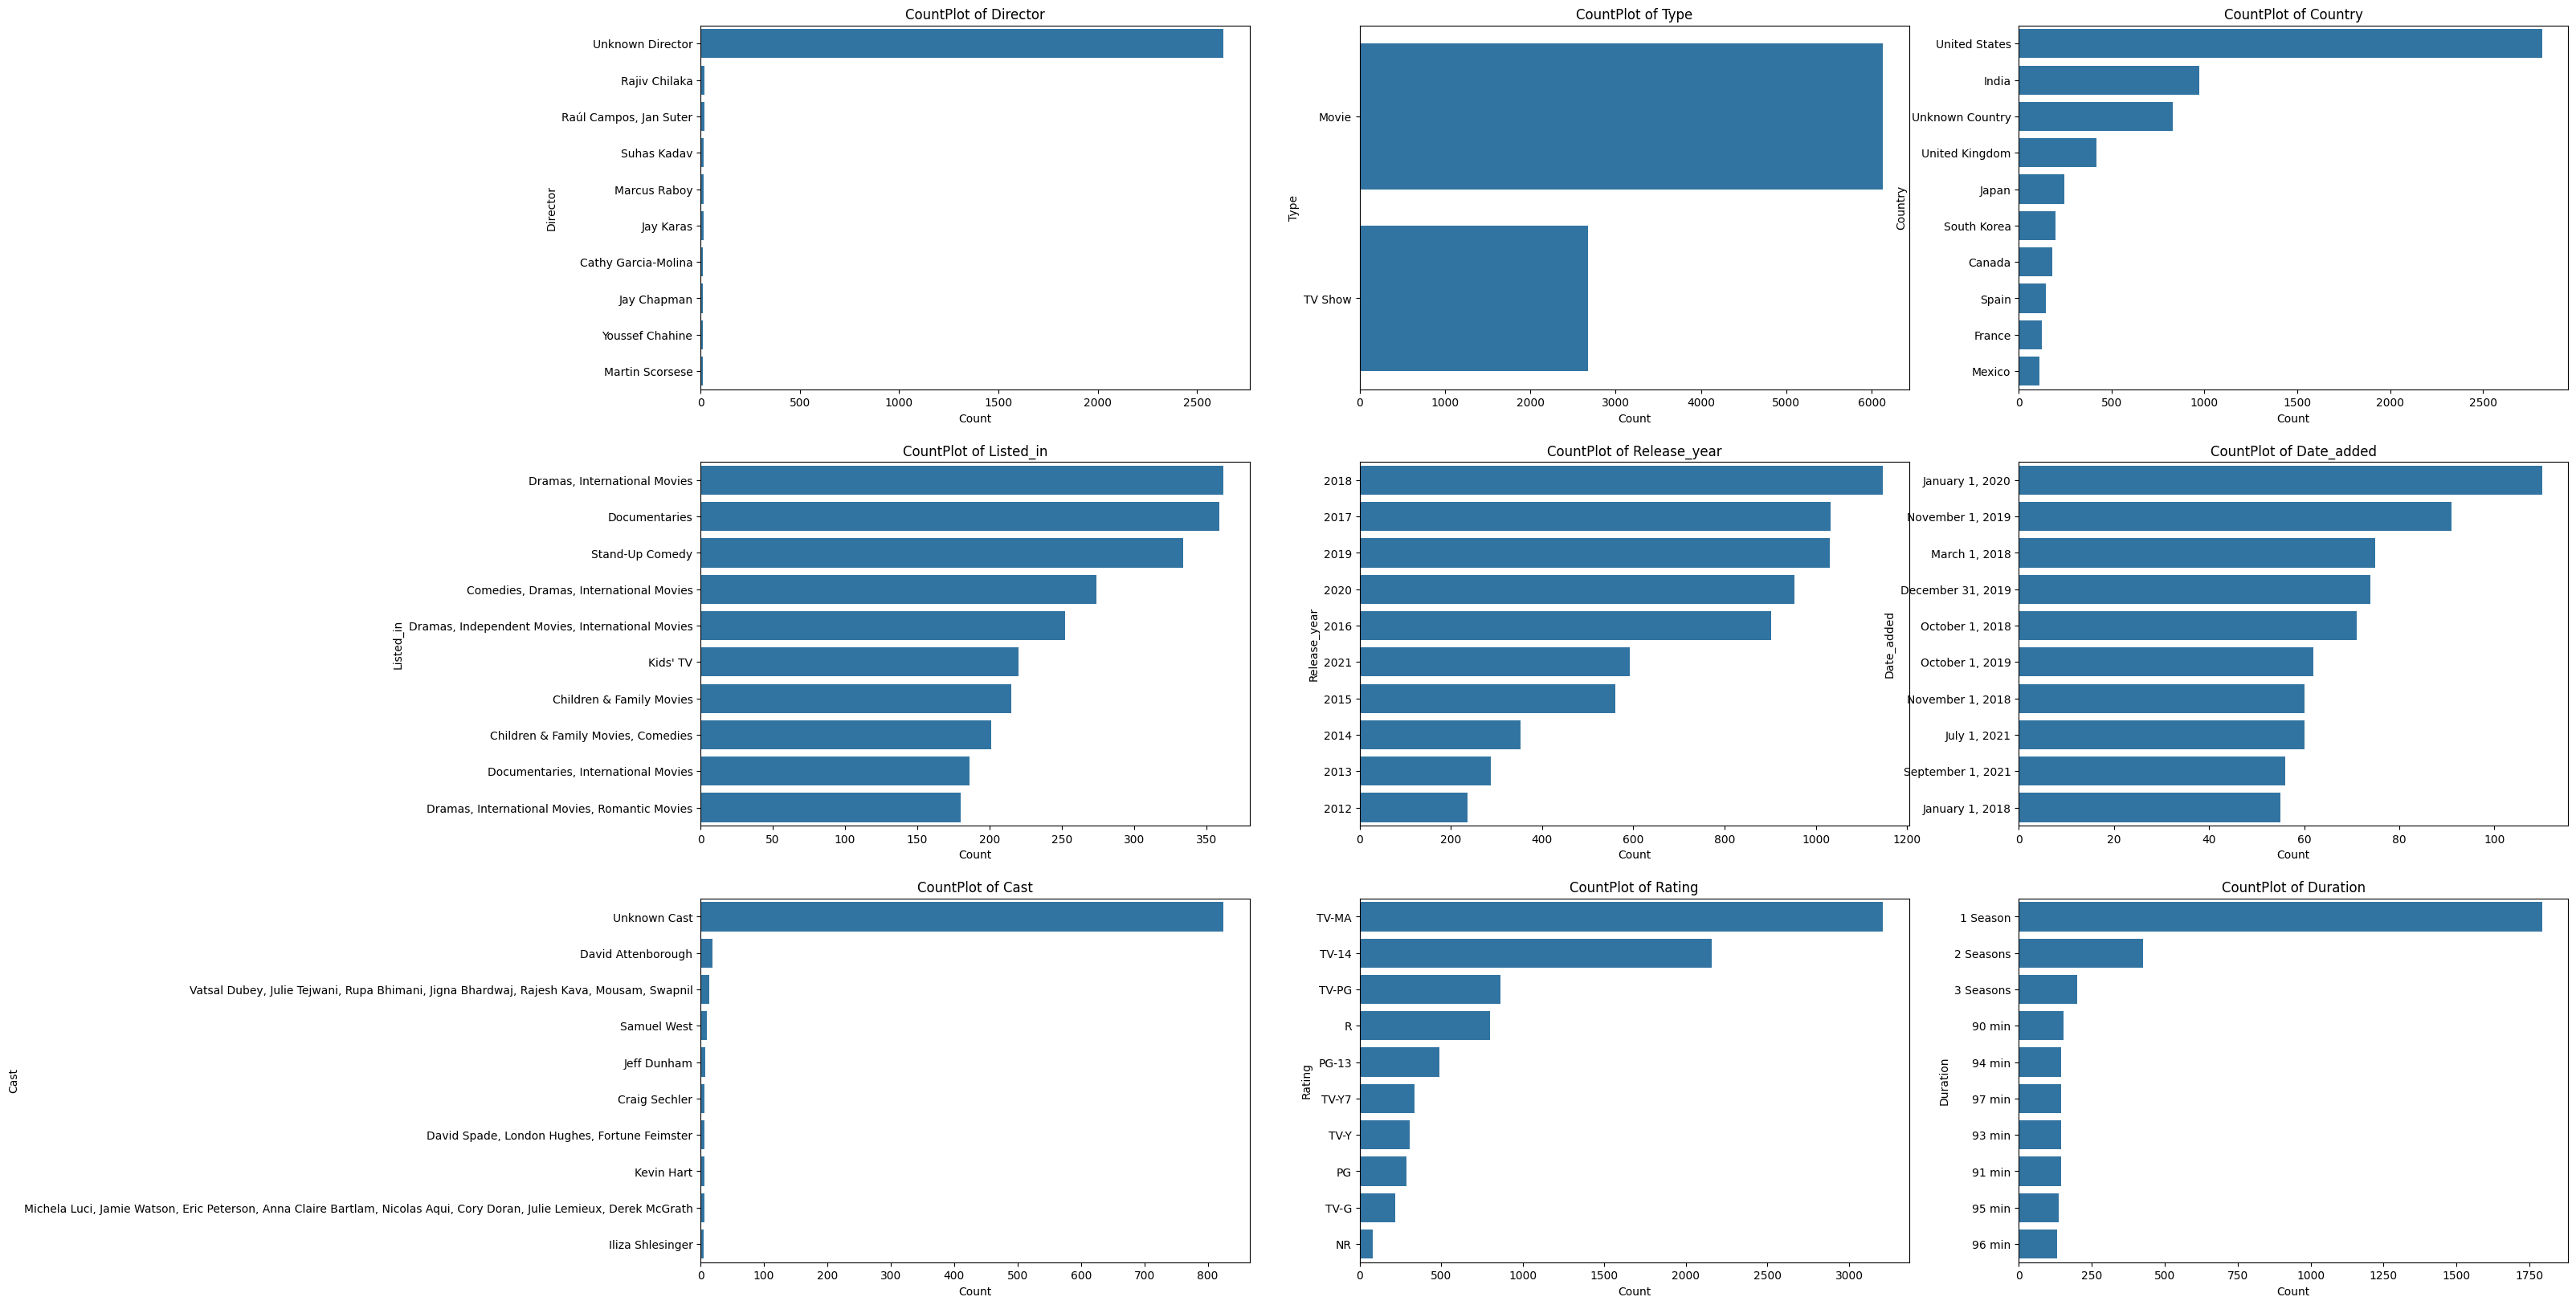

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    order = netflix_data[column].value_counts().index[:10]
    sns.countplot(y=netflix_data[column], order=order, ax=axes[i])
    axes[i].set_title(f'CountPlot of {column.capitalize()}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column.capitalize())
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].tick_params(axis='x', labelsize=10)

plt.show()

**_Distribution of Data by Rating_**

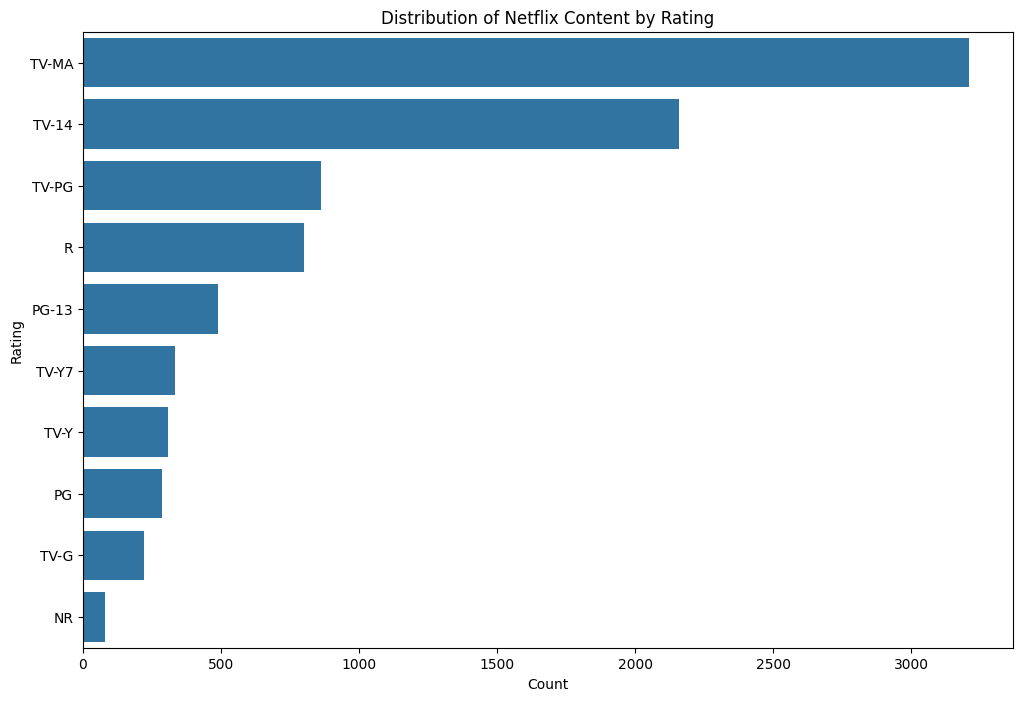

In [25]:
# Distribution of Data by Rating
plt.figure(figsize=(12, 8))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index[:10])
plt.title('Distribution of Netflix Content by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

**Insights**
* Understanding the distribution of ratings can guide content selection and recommendation algorithms.

**Recommendations**
* Focus on enhancing high-rated content production to improve overall viewer satisfaction.

**Overall Insights for Non-Graphical and Graphical Analysis of Categorical Variables**
* Distribution of TV Shows and Movies: The analysis reveals that the distribution of TV shows and movies on Netflix varies significantly across countries. The United States, India, and the United Kingdom are identified as the leading producers of movies, while the US, UK, and Japan dominate TV show production. India, despite having a large film industry, produces comparatively fewer TV shows.

* Unique Titles: The number of unique titles available on Netflix indicates a diverse content library. This variety enhances viewer engagement, catering to different tastes and preferences.

* Categorical Trends: Insights into categorical variables such as directors, genres, and ratings provide a comprehensive understanding of the types of content being produced and their popularity among audiences.

**Overall Recommendations for Non-Graphical and Graphical Analysis of Categorical Variables**
* Content Localization: Given the high production rates of TV shows and movies in certain countries, Netflix should consider investing in localized content. Tailoring shows and movies to reflect local cultures and preferences can significantly enhance viewer engagement.

* Collaborations with Local Talent: Establishing partnerships with local filmmakers, production houses, and writers in key markets can lead to the creation of diverse and culturally relevant content, further expanding Netflix's appeal.

* Genre Analysis and Tailoring Content: Analyzing genre preferences in different regions can provide valuable insights. Netflix should focus on promoting and producing content that aligns with the most popular genres in various markets to attract a larger audience.

* Data-Driven Strategy: Continuously monitoring the distribution and performance of content across different countries can help Netflix make informed decisions about future productions and marketing strategies, ensuring they stay ahead in a competitive landscape.

* Enhanced Marketing Strategies: Utilize the insights from viewer preferences and content distribution to inform targeted marketing campaigns, which can increase viewer acquisition and retention rates in key markets.

#### **_8. Distribution of Data by Release Year and Rating_**

**_8.1. Distribution of Data by Release Year_**

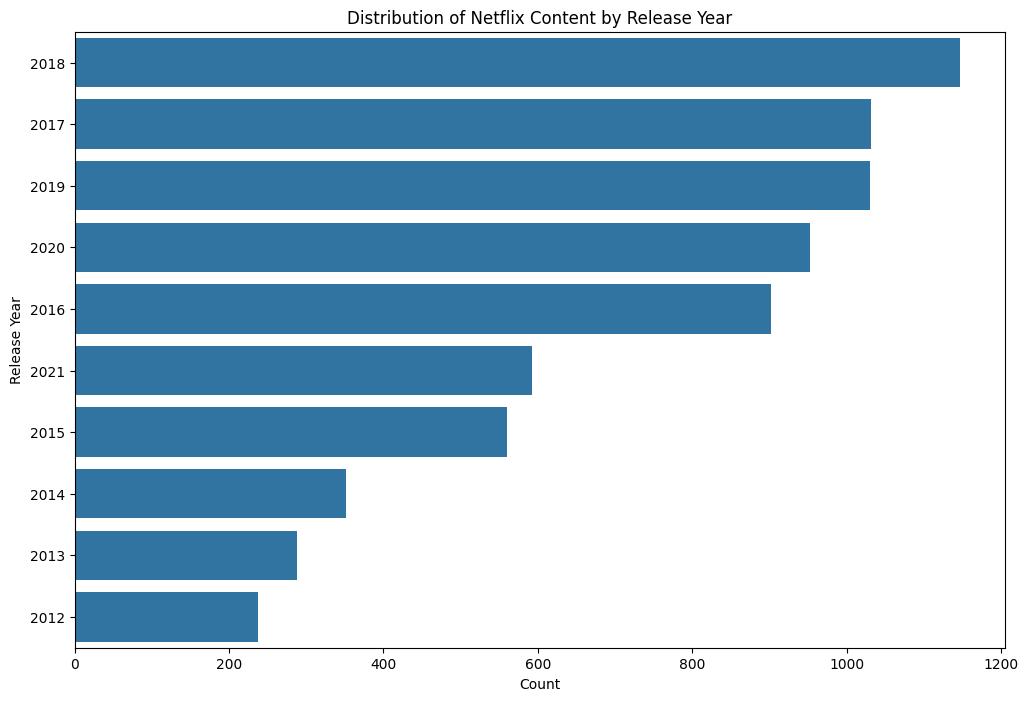

In [26]:
# Distribution of Data by Release Year
plt.figure(figsize=(12, 8))
sns.countplot(y='release_year', data=netflix_data, order=netflix_data['release_year'].value_counts().index[:10])
plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Count')
plt.ylabel('Release Year')
plt.show()

**_8.2. Distribution of Data by Rating_**

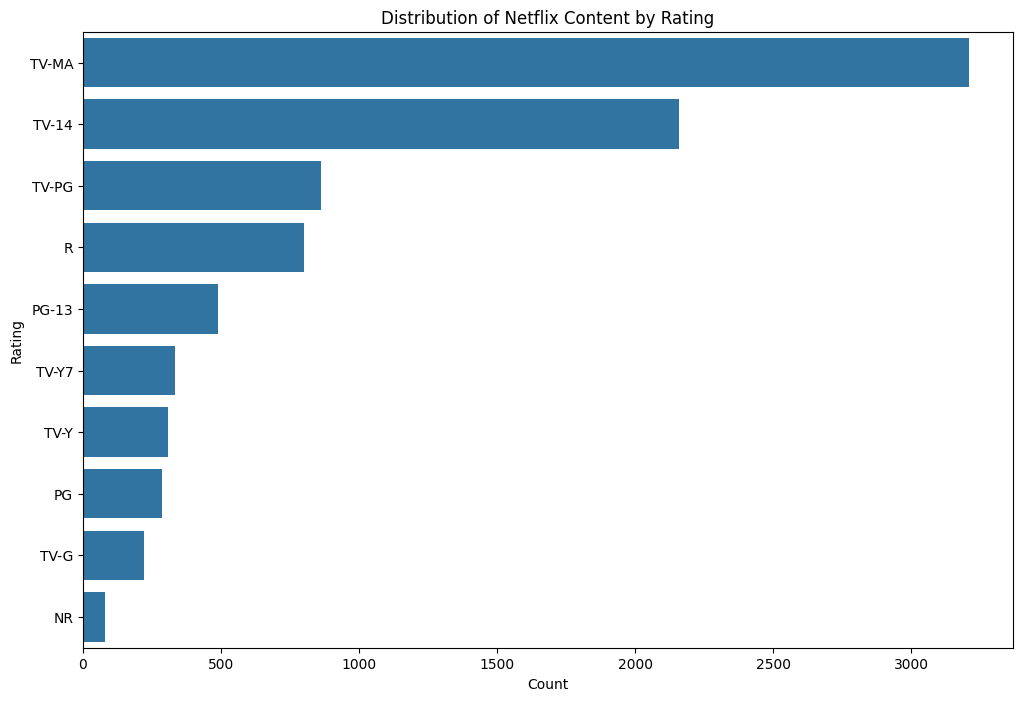

In [27]:
# Distribution of Data by Rating
plt.figure(figsize=(12, 8))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index[:10])
plt.title('Distribution of Netflix Content by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

**Insight for Distribution of Data by Release Year and Rating**
* Analyzing the distribution of data by release year and rating reveals trends in content production and viewer preferences over time, indicating which types of content resonate most with audiences.

**Recommendations for Distribution of Data by Release Year and Rating**
* Use this data to identify successful genres and ratings, guiding future content acquisition and production strategies to enhance viewer engagement and satisfaction.

#### **_9. Best Time to Launch a TV Show or Movie_**

**_9.1 Best Week to Release a TV Show or Movie_**

In [28]:
# Convert the 'Date' column to datetime
netflix_data = netflix_data[netflix_data['date_added'] != 'Unknown Date_added']
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Extract the week from the 'Date' column
netflix_data['Week'] = netflix_data['date_added'].dt.isocalendar().week

# Filter for TV shows and movies
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')

# Counting the number of titles per week and finding the week with the highest count
tv_shows_weekly = tv_shows.groupby('Week')['title'].count()
movies_weekly = movies.groupby('Week')['title'].count()

# Finding the best weeks
best_tv_shows_week = tv_shows_weekly.idxmax()
best_movies_week = movies_weekly.idxmax()

print('The best week to release the TV show:', best_tv_shows_week)
print('The best week to release the Movie:', best_movies_week)

The best week to release the TV show: 27
The best week to release the Movie: 1


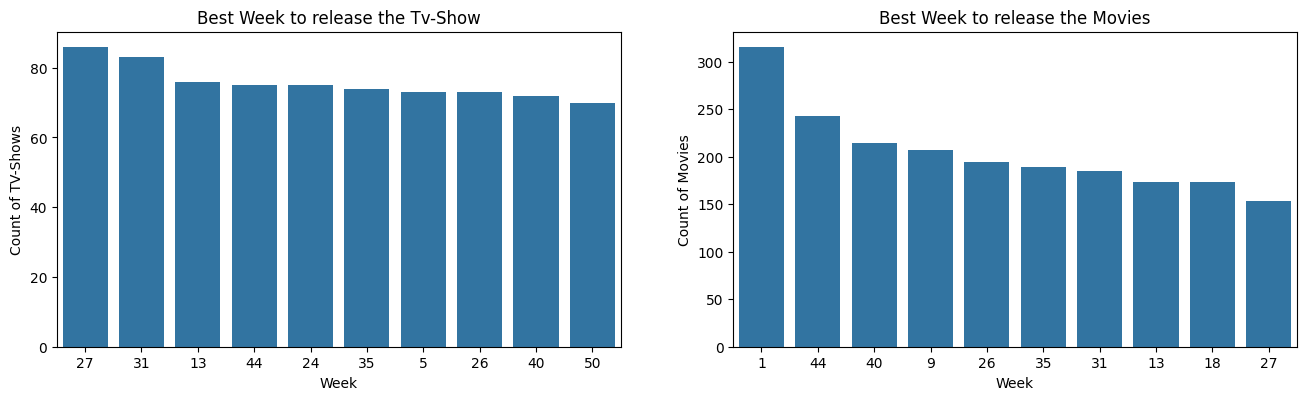

In [29]:
# Visualization
tv_shows_weekly = tv_shows_weekly.sort_values(ascending=False).iloc[:10]
movies_weekly = movies_weekly.sort_values(ascending=False).iloc[:10]

plt.figure(figsize=(16, 9))
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_weekly.index, y=tv_shows_weekly.values, order=tv_shows_weekly.index)
plt.title('Best Week to release the Tv-Show')
plt.xlabel('Week')
plt.ylabel('Count of TV-Shows')

plt.subplot(2,2,2)
sns.barplot(x=movies_weekly.index, y=movies_weekly.values, order=movies_weekly.index)
plt.title('Best Week to release the Movies')
plt.xlabel('Week')
plt.ylabel('Count of Movies')
plt.show()

**Insights:**

* The analysis identifies Week 27 as the best week for releasing TV shows, while Week 1 is the best for movies, suggesting specific times when audience engagement peaks.

**Recommendations:**

* Schedule TV show launches during Week 27 and movie releases in Week 1 to maximize viewership.
* Consider promotional activities during these weeks to further boost audience interest.


**_9.2 Best Month to Release a TV Show or Movie_**

In [30]:
netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added']))
netflix_data['Month'] = netflix_data['date_added'].dt.month
# Assuming 'tv_shows' is your DataFrame
tv_shows = netflix_data.query('type == "TV Show"')
# Assuming 'movies' is your DataFrame
movies = netflix_data.query('type == "Movie"')
# Counting the number of titles per month and finding the month with the highest count
# I've grouped by 'Month' and counted the number of movies and tv-shows, then sorted in descending order
tv_shows_monthly = tv_shows.groupby('Month')['show_id'].count()
18
movies_monthly = movies.groupby('Month')['show_id'].count()
best_tv_shows_month = tv_shows_monthly.idxmax()
best_movies_month = movies_monthly.idxmax()
print('The best month to release the TV show:', best_tv_shows_month)
print('The best month to release the Movie:',best_movies_month)


The best month to release the TV show: 12
The best month to release the Movie: 7


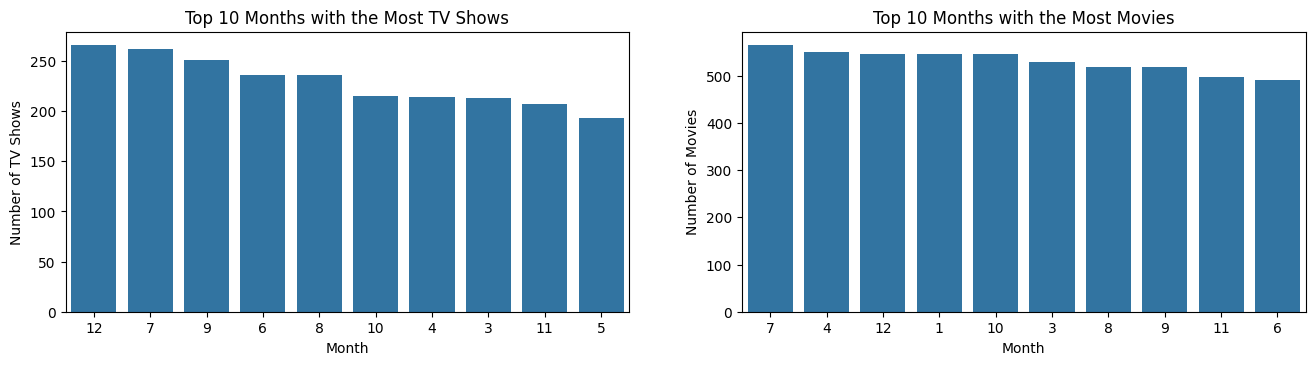

In [31]:
# Visualization
tv_shows_monthly = tv_shows_monthly.sort_values(ascending=False).iloc[:10]
movies_monthly = movies_monthly.sort_values(ascending=False).iloc[:10]

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=tv_shows_monthly.index, y=tv_shows_monthly.values, order=tv_shows_monthly.index)
plt.title('Top 10 Months with the Most TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')

plt.subplot(2, 2, 2)
sns.barplot(x=movies_monthly.index, y=movies_monthly.values, order=movies_monthly.index)
plt.title('Top 10 Months with the Most Movies')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

**Insights:**

* December is highlighted as the best month for TV shows, while July is optimal for movie releases, indicating seasonal trends in audience viewing habits.
  
**Recommendations:**
* Plan for major TV show launches in December and movie releases in July to align with heightened viewer engagement.
* Use holiday-themed promotions for December releases to capitalize on festive viewing trends.

**_9.3 Best Day to Release a TV Show or Movie_**

In [32]:
netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added']))
netflix_data['Day'] = netflix_data['date_added'].dt.day_name()
# Assuming 'tv_shows' is your DataFrame
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')
# Counting the number of titles per month and finding the month with the highest count
bestday_tv_shows = tv_shows.groupby('Day')['show_id'].nunique()
bestday_movies = movies.groupby('Day')['show_id'].nunique()
most_popular_tvshows_day = bestday_tv_shows.idxmax()
most_popular_movie_day = bestday_movies.idxmax()
print('The best day to release the TV show:', most_popular_tvshows_day)
print('The best day to release the Movie:',most_popular_movie_day)


The best day to release the TV show: Friday
The best day to release the Movie: Friday


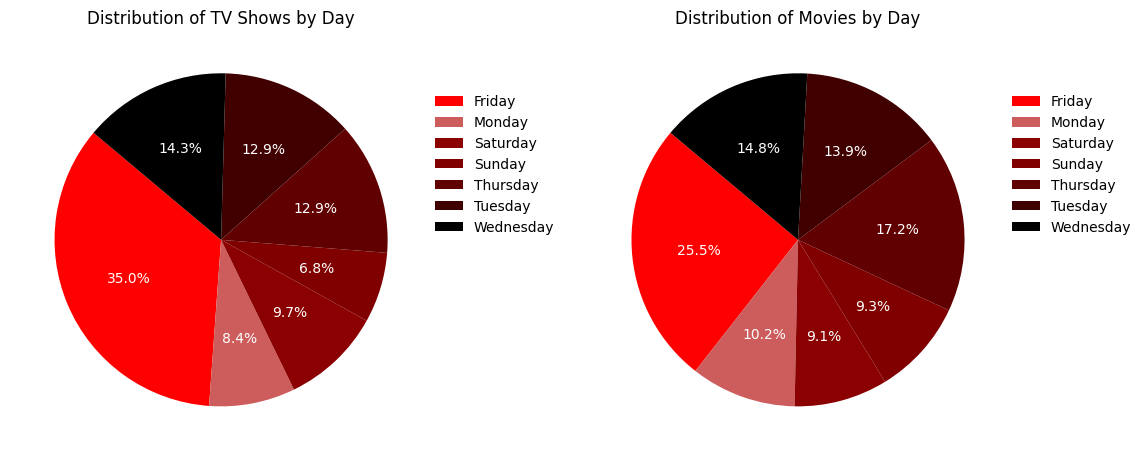

In [33]:
# Visualization
plt.figure(figsize=(12, 9))
colors = ['#FF0000', '#CD5C5C', '#8B0000', '#800000', '#600000', '#400000', '#000000']

plt.subplot(2, 2, 1)
plt.pie(bestday_tv_shows.values, labels=bestday_tv_shows.index, autopct='%1.1f%%',
        colors=colors, startangle=140, textprops={'color': "white"})
plt.title('Distribution of TV Shows by Day')
plt.legend(loc=(1, 0.5), frameon=False)

plt.subplot(2, 2, 2)
plt.pie(bestday_movies.values, labels=bestday_movies.index, autopct='%1.1f%%',
        colors=colors, startangle=140, textprops={'color': "white"})
plt.title('Distribution of Movies by Day')
plt.legend(loc=(1, 0.5), frameon=False)

plt.tight_layout()
plt.show()

**Insights:**

* Fridays are the most favorable day for releasing both TV shows and movies, highlighting audience preferences for weekend viewing.
  
**Recommendations:**

* Schedule major releases on Fridays to leverage increased viewership and audience engagement.
* Consider marketing strategies that ramp up on Thursdays to build anticipation for Friday launches.

**Overall Insights for Best Time to Launch a TV Show or Movie:**
* Seasonal Distribution of Releases: The analysis reveals significant seasonal trends in the release of TV shows and movies on Netflix. Certain weeks and months exhibit clear peaks in content launches, indicating optimal times for audience engagement.

* Optimal Timing for TV Shows: The 27th week of the year (typically around early July) emerges as the most favorable time for launching new TV shows. Additionally, December is highlighted as a prime month for releases, suggesting a correlation with viewer availability during holidays.

* Optimal Timing for Movies: The first week of the year is identified as the best time to release movies, while July stands out as a month with high viewer engagement for movie launches. The analysis indicates that peak release times for movies generally occur in early summer, early fall, and late winter/early spring.

* Genre and Audience Preferences: The data suggests that viewer preferences vary by genre and timing, indicating the need for strategic planning around content diversity to cater to audience interests throughout the year.

**Overall Recommendations for Best Time to Launch a TV Show or Movie:**
* Strategic Content Release: Netflix should align its content release schedule with the identified peak times for TV shows and movies. This strategy can enhance viewership and engagement by capitalizing on periods when audiences are most receptive.

* Enhanced Marketing Efforts: Implement targeted marketing and promotional campaigns during peak months to maximize visibility and attract larger audiences. Engaging promotional activities can elevate interest in upcoming releases.

* Diversification of Content: To better cater to audience preferences, Netflix should explore and analyze which genres or types of content perform best during specific months. This insight can guide the diversification of offerings throughout the year.

* Optimizing Release Days: Utilizing the insights on the best days for launching TV shows and movies can significantly impact viewer engagement. Scheduling releases on popular days can help create a strong impact and attract larger audiences.

* Viewer Engagement Initiatives: Netflix should consider interactive engagement strategies, such as social media campaigns or live events, during the identified peak months and days. Enhancing viewer engagement can enrich the overall viewing experience.

* Continuous Monitoring and Adaptation: Regularly tracking viewership trends and adapting release strategies based on changing audience preferences will ensure that Netflix remains responsive and effective in its content strategy.

* Collaboration Opportunities: Netflix should seek collaboration with influencers and other content creators during peak months. Such partnerships can amplify the reach of new releases and enhance their visibility.

#### **_10. Analysis of Actors/Directors of Different Types of Shows/Movies_**

**_10.1 Identifying the Top 10 Actors Who Have Appeared in Most Movies or TV Shows_**

In [34]:
# Stripping any leading/trailing whitespace from the cast names
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

# Grouping by 'cast' and counting unique 'show_id' (titles)
unique_cast_titles_count = unnested_cast.groupby('cast')['show_id'].nunique().sort_values(ascending=False).head(10)
unique_cast_titles_count


,show_id
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<ipython-input-35-00f006e71d45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unique_cast_titles_count.index, x=unique_cast_titles_count.values, palette='viridis')


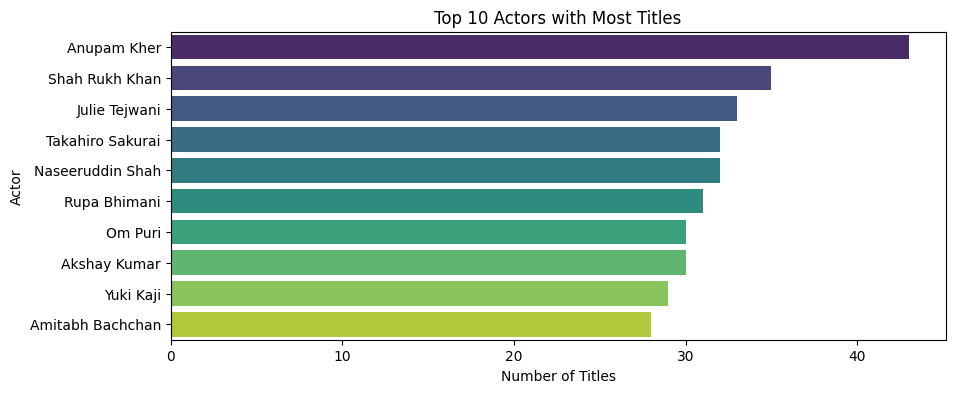

In [35]:
# Plotting the top 10 actors
plt.figure(figsize=(10, 4))
sns.barplot(y=unique_cast_titles_count.index, x=unique_cast_titles_count.values, palette='viridis')
plt.title('Top 10 Actors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


**Insights:**

* Prolific Presence of Anupam Kher: Anupam Kher leads with 43 appearances, indicating a strong and enduring presence in the industry.
  
* Widespread Popularity of Shah Rukh Khan: With 35 appearances, his popularity reflects a strong appeal to a broad audience.
  
* Global Diversity in Cast: The presence of international actors like Takahiro Sakurai and Yuki Kaji showcases a diverse casting strategy.
  
* Balanced Mix of Veteran and Newer Talents: The blend of veteran actors (Naseeruddin Shah, Amitabh Bachchan) with newer talents offers a dynamic range of performances.
  
**Recommendations:**

* Collaboration with Influential Actors: Netflix should consider partnering with prominent actors like Anupam Kher and Shah Rukh Khan to leverage their fanbases.
  
* Exploration of Global Content: Collaborating with international talents can enhance Netflix’s appeal in global markets.
  
* Leverage Veteran Talent for Quality Content: Involving established actors can contribute to producing high-quality and critically acclaimed projects.

**_10.2 Identifying the Top 10 Directors Who Have Appeared in Most Movies or TV Shows_**

In [36]:
# Group by 'director' and count unique occurrences, then sort in descending order
director_unique = unnested_director.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
director_unique


,title
director,
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


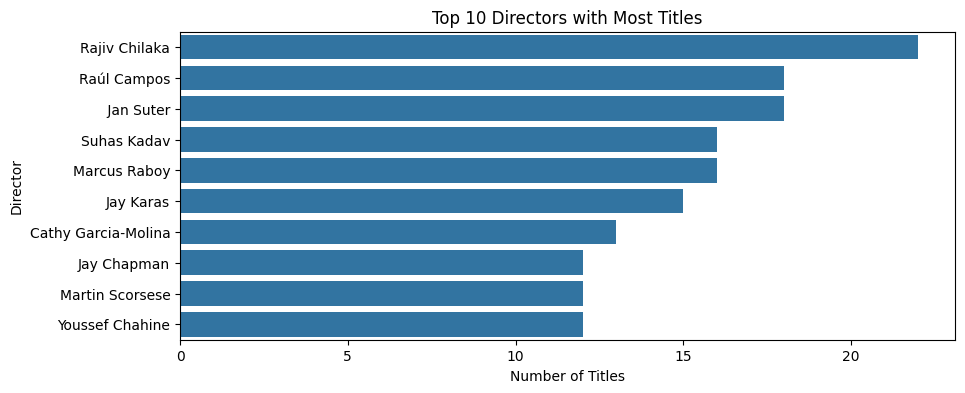

In [37]:
# Creating a barplot for the top 10 directors
plt.figure(figsize=(10, 4))
sns.barplot(y=director_unique.index, x=director_unique.values)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


**Insights:**

* Top Three Directors: Rajiv Chilaka, Raúl Campos, and Jan Suter lead the list, showcasing significant contributions to Netflix’s library.

* Diversity in Content Creation: The mix of directors from different backgrounds highlights Netflix’s commitment to varied storytelling.

* Martin Scorsese’s Presence: His involvement indicates a focus on collaborating with established industry talent.

**Recommendations:**

* Collaboration and Expansion: Continue partnerships with prolific directors to enhance the content library.

* Emerging Talent: Support emerging directors like Suhas Kadav and Marcus Raboy to foster new voices in the industry.

* Quality Content: Leverage experienced directors to produce high-quality content that attracts a wide audience.

* Regional Content: Engage directors like Cathy Garcia-Molina and Youssef Chahine to create content catering to diverse audiences.

#### **_11. Analysis of Time to Add Movies to Netflix_**

In [38]:
# Converting 'date_added' and 'release_year' to datetime for calculation
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['release_date'] = pd.to_datetime(netflix_data['release_year'], format='%Y')

# Calculating the difference in days between 'date_added' and 'release_date'
netflix_data['days_to_add'] = (netflix_data['date_added'] - netflix_data['release_date']).dt.days

# Calculating the average time to add a title after its initial release
average_days_to_add = netflix_data['days_to_add'].mean()

# Calculating the mode time to add a title after its initial release
mode_days_to_add = netflix_data['days_to_add'].mode()[0]

print('The average days of adding a movie after its release on Netflix: ', round(average_days_to_add, 2))
print('The mode days of adding a movie after its release on Netflix:', mode_days_to_add)


The average days of adding a movie after its release on Netflix:  1895.37
The mode days of adding a movie after its release on Netflix: 334


**Insights:**
  
* Average Addition Time: On average, it takes approximately 1895 days for movies to be added to Netflix, with 334 days being the most common timeframe.
* Content Strategy: This data indicates that there are specific timeframes when movies are more likely to be added, which could help inform Netflix’s acquisition strategy.

**Recommendations:**
* Diversify Genre Offerings: Since a significant amount of content is classified as adult (TV-MA), Netflix should focus on diversifying its offerings to attract a broader audience, including family-friendly content.
* Optimal Release Timing: Content should be launched during peak periods, such as holidays and summer, to maximize viewership.
* Emphasize Popular Genres: Focus on producing more content in popular genres like drama, comedy, crime, action, and adventure to meet viewer preferences.
* Leverage Global Talent: Utilize popular actors from regions like Japan and India to enhance content appeal, especially since these actors have significant followings on platforms like Netflix.

#### **_12. Exploring Correlations Between Ratings, Genres, and Durations_**

**_12.1. Data Preparation for Movie Analysis_**

In [39]:
# Filtering the data to include only movies
movies_data = netflix_data[netflix_data['type'] == 'Movie'].copy()  # Create a copy

# Convert 'duration' into a numeric value for movies using .loc
movies_data.loc[:, 'duration_numeric'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Exploring the relationship between a movie's rating and its genre
genre_rating = unnest_dataframe(movies_data, 'listed_in').groupby(['rating','listed_in']).size().unstack().fillna(0)
# Exploring the relationship between a movie's rating and its duration
duration_rating = movies_data.groupby('rating')['duration_numeric'].mean()
genre_rating, duration_rating

(listed_in        Anime Features   Children & Family Movies   Classic Movies  \
 rating                                                                        
 66 min                      0.0                        0.0              0.0   
 74 min                      0.0                        0.0              0.0   
 84 min                      0.0                        0.0              0.0   
 G                           0.0                        0.0              4.0   
 NC-17                       0.0                        0.0              0.0   
 NR                          0.0                        0.0              0.0   
 PG                          1.0                       16.0             12.0   
 PG-13                       2.0                        9.0              4.0   
 R                           0.0                        0.0              8.0   
 TV-14                      20.0                        1.0              4.0   
 TV-G                        0.0        

**Insights:**

* The dataset is now filtered to focus solely on movies, allowing for a clearer analysis of ratings, genres, and durations.
* The duration has been converted to a numeric format, making it suitable for quantitative analysis.

**Recommendations:**

* Ensure data integrity during conversions. It's essential to check for any potential missing or malformed data before analysis.

**_12.2. Analyzing the Relationship Between Movie Ratings and Genres_**

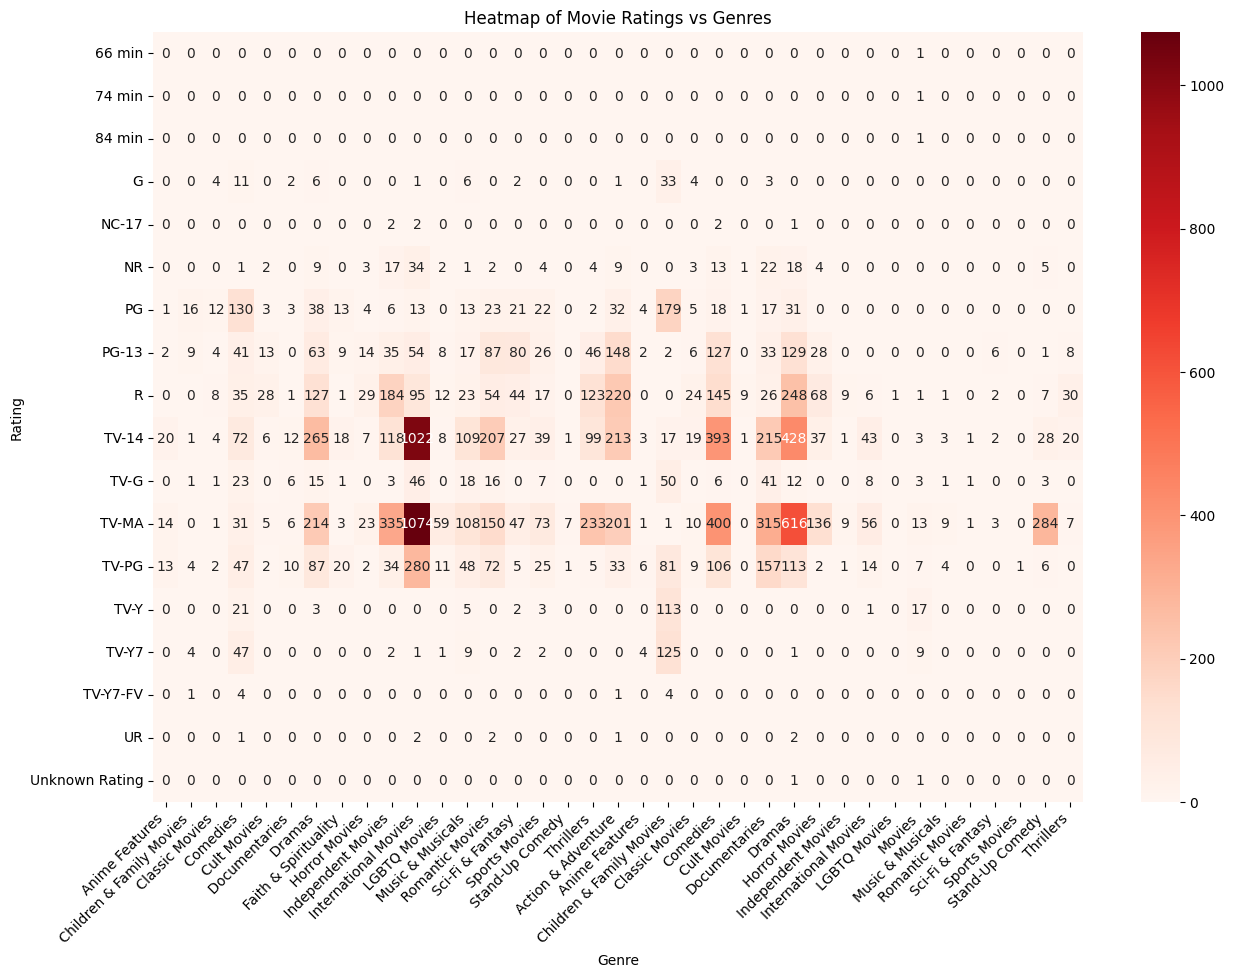

In [40]:
# Exploring the relationship between a movie's rating and its genre
genre_rating = unnest_dataframe(movies_data, 'listed_in').groupby(['rating', 'listed_in']).size().unstack().fillna(0)

# Creating a heatmap for the relationship between movie rating and genre
plt.figure(figsize=(15, 10))
sns.heatmap(genre_rating, cmap='Reds', annot=True, fmt=".0f")
plt.title('Heatmap of Movie Ratings vs Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


**Insights:**

* The heatmap displays the count of movies categorized by their genre and rating, revealing trends in genre preferences across different ratings.
* Genres with higher counts in certain rating categories suggest targeted viewer interests and preferences.

**Recommendations:**

* Marketing and Promotion: Utilize insights on genre popularity within specific rating categories to develop targeted marketing strategies, especially for family-friendly genres in regions with many children.
* Content Strategy: Use the insights to guide content acquisition and production decisions, focusing on high-demand genres, especially in mature content.


**_12.3. Analyzing the Relationship Between Movie Ratings and Average Duration_**

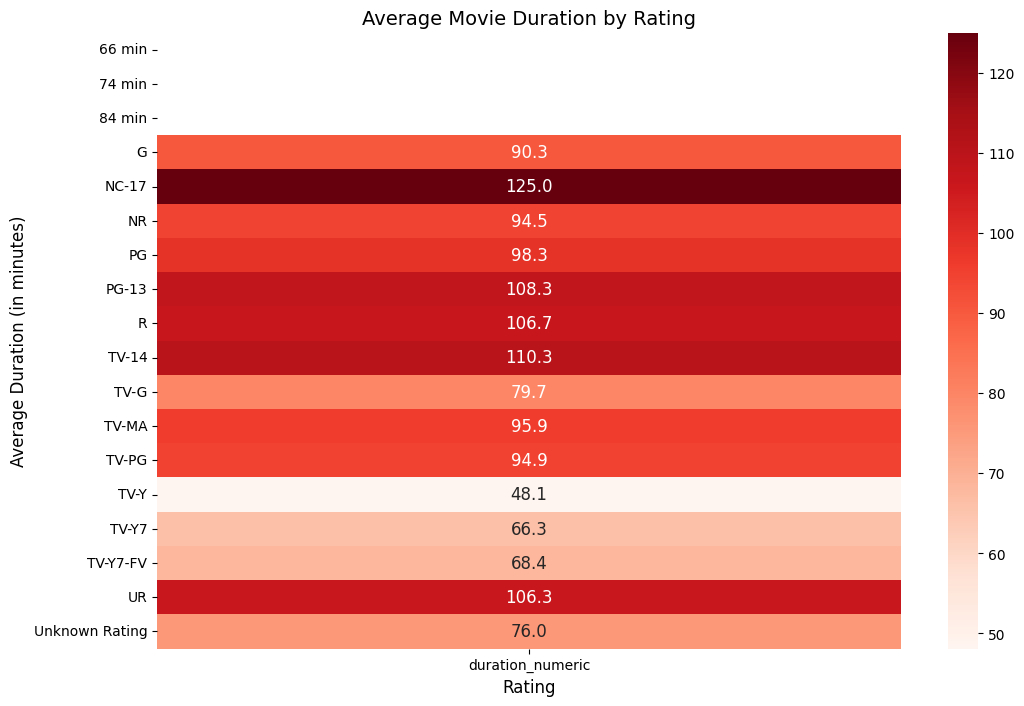

In [41]:
# Exploring the relationship between a movie's rating and its duration
duration_rating = movies_data.groupby('rating')['duration_numeric'].mean()

# Convert the Series to a DataFrame for visualization
duration_rating_df = duration_rating.reset_index()

# Setting up the figure with a larger size for better readability
plt.figure(figsize=(12, 8))
# Creating the heatmap for average movie duration by rating
sns.heatmap(duration_rating_df.set_index('rating'), cmap='Reds', annot=True, fmt=".1f", annot_kws={'size': 12})
plt.title('Average Movie Duration by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Duration (in minutes)', fontsize=12)
plt.show()


**Insights:**

* Ratings like ‘NC-17’ and ‘R’ show longer average durations, indicating that more mature content often involves longer storytelling.
* Ratings aimed at younger audiences, such as ‘G’, ‘TV-Y’, and ‘TV-Y7’, exhibit shorter average durations, aligning with the attention spans of younger viewers.
* Consistent average durations are seen in ratings like ‘PG’, ‘PG-13’, and ‘TV-MA’, typically around 90-110 minutes.

**Recommendations:**

* Content Development: Given the longer durations in mature ratings, Netflix should explore producing more complex narratives in these categories.
* Shorter Content for Kids: For family-friendly content, consider developing shorter episodes or films to cater to younger audiences’ attention spans.
* Consistent Durations: Maintain an average duration of 90-110 minutes for feature films to align with audience expectations for mainstream movies.

#### **_13. Average Duration of Movies across Different Genres_**

In [42]:
# Handling NaN values in 'duration' column
# It's possible that some movie durations are not provided, so we'll replace NaNs with the mean duration
mean_duration = movies_data['duration'].str.replace(' min', '').astype(float).mean()
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').fillna(mean_duration).astype(int)

# Repeating the un-nesting and averaging process
unnested_genre = unnest_dataframe(movies_data, 'listed_in')
average_duration_per_genre = unnested_genre.groupby('listed_in')['duration'].mean().reset_index()
average_duration_per_genre.sort_values(by='duration', ascending=False)



,listed_in,duration
2,Classic Movies,127.138889
6,Dramas,116.288996
21,Classic Movies,114.825000
18,Action & Adventure,113.515716
25,Dramas,111.377500
13,Romantic Movies,110.706362
10,International Movies,110.461509
17,Thrillers,108.082031
28,International Movies,108.062500
12,Music & Musicals,106.960784


<ipython-input-43-388aa391356d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="duration", y="listed_in", data=sorted_data, palette=palette)


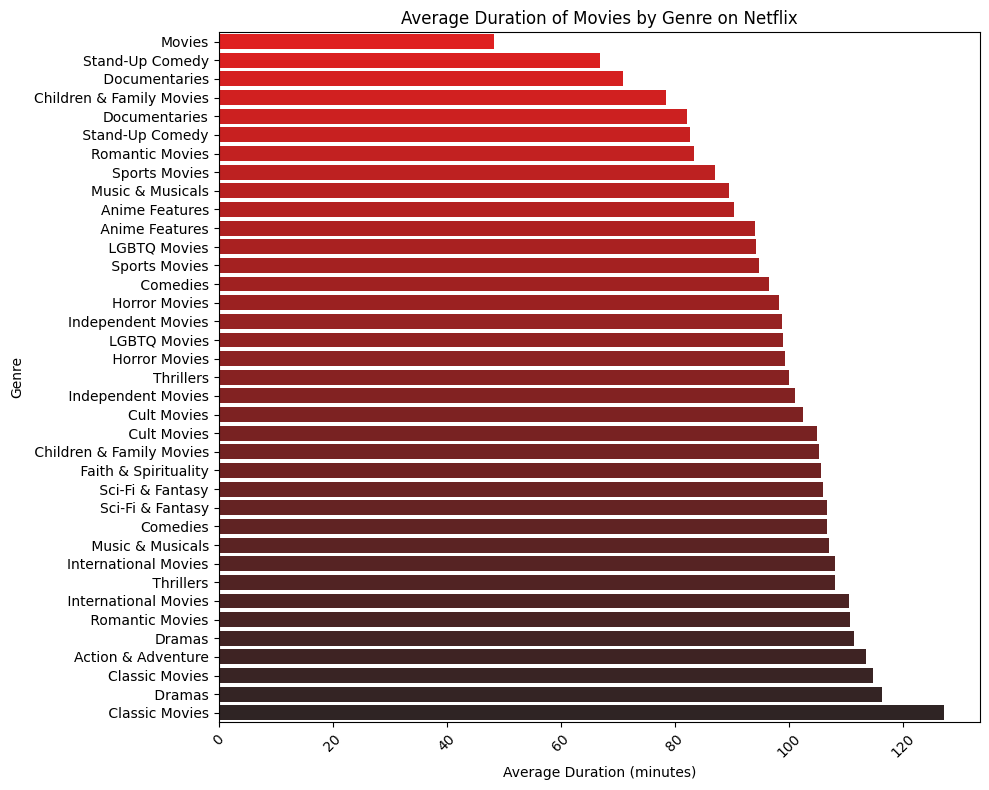

In [43]:
# Sorting the data for a better plot
sorted_data = average_duration_per_genre.sort_values(by='duration', ascending=True)

# Setting the color palette to shades of red and black
palette = sns.color_palette("dark:red_r", len(sorted_data))

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="duration", y="listed_in", data=sorted_data, palette=palette)
plt.title('Average Duration of Movies by Genre on Netflix')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


**Insight:**
  
* The bar plot visually represents the average durations of movies by genre, making it easy to identify trends. For instance, genres like Classic Movies and Dramas show longer durations, while Documentaries and Stand-Up Comedies have shorter durations.

**Recommendation:**

* Utilize these insights to inform production schedules and marketing strategies, especially targeting genres that align with viewer preferences.

### Genre-Specific Duration Trends

#### 1. Duration Insights by Genre

* **Classic Movies and Dramas:**
  * Tend to have longer durations.
  * This can be attributed to the narrative depth and character development often required in these genres.

* **Documentaries and Stand-Up Comedy:**
  * Typically have shorter durations.
  * Documentaries aim for conciseness to effectively deliver factual content.
  * Stand-up comedy specials are generally shorter to maintain audience engagement.

#### 2. Viewer Preferences and Consumption Patterns

* **Shorter Durations:**
  * Genres like documentaries align with viewers’ preferences for concise, informative content.
  * Such content can be consumed in a single sitting, appealing to viewers seeking quick engagement.

* **Longer Durations:**
  * Genres such as dramas and classic movies may attract viewers who prefer in-depth storytelling.
  * These viewers are often willing to commit more time to a single movie, suggesting a different consumption pattern.


### Recommendations

#### 1. Strategic Release Timing

* **Optimization of Release Schedules:**
  * Conducting a time series analysis of content additions can guide Netflix in optimizing the timing of new releases.
  * Understanding seasonal patterns or specific times when subscribers are more likely to watch new content can aid in planning.

* **Analysis Findings:**
  * Fridays are the most popular day for releases.
  * Week 1 is the most popular for Movies, while week 27 is the most popular for TV Shows.
  * July is identified as the best month to release a Movie, and December is recommended for TV Show releases.

#### 2. Expand Popular Genres in Key Ratings

* **Content Production Strategy:**
  * If certain genres are performing well in specific rating categories, Netflix should consider increasing the production or acquisition of similar content.
  * This strategy caters to the established audience and aligns with viewer preferences.

* **Popular Rating-Genre Pairs:**
  * Notably, TV-MA & TV-14 ratings in International Movies, along with TV-MA ratings in Dramas, are very popular.
  * Focusing on these genres and ratings can enhance viewer satisfaction and retention.


 #### **_14. Analyzing Movie Genres on Netflix_**

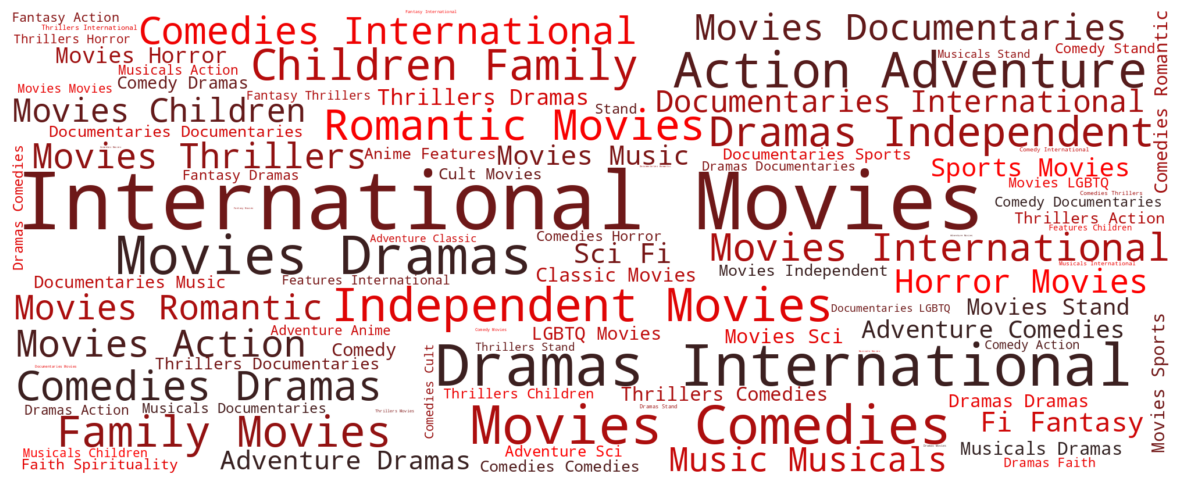

In [44]:
from wordcloud import WordCloud

# Extracting data for movies only
movie_genre = netflix_data[netflix_data['type'] == 'Movie']

# Creating a text string from the 'listed_in' column for movies
text = str(list(movie_genre['listed_in'])).replace(',', '').replace("'", '').replace('"', '').replace('[', '').replace(']', '')

# Generating Word Cloud for movie genres
color = sns.color_palette("dark:red", as_cmap=True)
wordcld = WordCloud(max_words=150, width=2000, height=800, background_color='white', colormap=color).generate(text)

# Displaying the Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

# Overall Insights

### Seasonality in Releases
- **December** is the most popular month for releasing TV shows, likely due to increased viewer engagement during the holiday season.
- **July** is the best month for releasing movies, suggesting that summer might be a peak period for movie consumption.

### Content Type Focus
- Netflix seems to focus on **TV Shows** more in recent years compared to movies, with a clear increase in TV show releases.
- **TV Shows** are being produced and added to the platform at a faster rate, signaling Netflix’s strategic focus on long-form, episodic content.

### Duration of Content
- **Movies** generally have a wide duration range, with the average movie being around **90-120 minutes** long.
- **TV shows** have varying durations, mostly in terms of seasons rather than minutes.

### Content Ratings
- **TV-MA (Mature Audience)** and **TV-14** ratings are the most common for both movies and TV shows, indicating a large portion of content is targeted towards adult audiences.
- **International Movies** and **Dramas** rated **TV-MA** and **TV-14** have significant popularity.

### Global Availability
- The type and volume of content available differ across countries.
- **The U.S., India**, and other high-population countries have the largest variety of content, reflecting Netflix’s focus on these markets.

### Actors and Directors
- Some **actors and directors** are featured more frequently in Netflix content, which could indicate strong partnerships or high popularity.

### Top Days for Releases
- **Fridays** are the most popular day for both TV show and movie releases, aligning with weekend viewership peaks.
- **Week 1** is the most popular for movies, while **Week 27 (mid-year)** is popular for TV shows.

---

## Recommendations

### Seasonal Releases
- **Leverage Seasonal Trends**: Focus on releasing high-profile TV shows in December to capitalize on holiday viewership. Similarly, release blockbuster movies in July to take advantage of summer vacations and peak movie-watching periods.

### Strategic Content Focus
- **Increase Production of Popular Genres**: Focus on producing more **TV-MA** and **TV-14** content, especially in the genres of **Dramas** and **International Movies**, as these ratings and genres are consistently popular.

### Global Content Strategy
- **Localized Content for Key Markets**: Expand localized content, especially in high-growth regions like **India** and **Latin America**, where unique tastes and preferences prevail. Tailoring content for specific regions will improve retention and growth.

### Optimize Release Days
- **Fridays for Major Releases**: Continue to schedule major content releases on Fridays to align with viewers’ increased availability during weekends. This has proven to boost engagement.

### Partnerships with Key Actors/Directors
- **Enhance Relationships**: Strengthen partnerships with frequently featured and popular actors/directors to maintain high production quality and viewer engagement.

---

## Suggestions

### Content Duration
- Use insights on content duration to align the length of **movies** or **TV episodes** with viewer preferences. Movies around **90-120 minutes** long seem to perform well.

### Content Diversity
- Ensure content diversity to appeal to a wider range of audiences. While Netflix has a strong focus on adult content, expanding content for **younger** and **family-friendly** audiences could widen the subscriber base.
